In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv("musk_csv.csv")
df.head(10)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
5,6,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,...,-138,-156,56,143,142,164,-67,-145,40,1
6,7,MUSK-211,211_1+15,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-145,37,1
7,8,MUSK-211,211_1+16,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1
8,9,MUSK-211,211_1+17,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1
9,10,MUSK-211,211_1+18,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-146,37,1


In [3]:
df.isna().sum() #checking if there exist 'nan' or null values in dataset.

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
f10                  0
f11                  0
f12                  0
f13                  0
f14                  0
f15                  0
f16                  0
f17                  0
f18                  0
f19                  0
f20                  0
f21                  0
f22                  0
f23                  0
f24                  0
f25                  0
f26                  0
f27                  0
                    ..
f138                 0
f139                 0
f140                 0
f141                 0
f142                 0
f143                 0
f144                 0
f145                 0
f146                 0
f147                 0
f148                 0
f149                 0
f150       

In [4]:
x= df.iloc[:,3:-1]
y=df.iloc[:,-1:]
x.shape

(6598, 166)

In [5]:
#Here, I will use PCA to analyze important features.
x_std=StandardScaler().fit_transform(x)

print(x_std.shape)

(6598, 166)


C:\Users\SHIVAM\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SHIVAM\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
mean_vec=np.mean(x_std,axis=0) # axis=0 means column
#print(mean_vec)
cov_mat=(x_std - mean_vec).T.dot((x_std - mean_vec))/(x_std.shape[0]-1)
print('Covariance Matrix')
print(cov_mat)

Covariance Matrix
[[ 1.00015158 -0.1424858  -0.16431736 ...  0.14202589  0.4431273
  -0.05720793]
 [-0.1424858   1.00015158  0.61176735 ... -0.06920348 -0.13311163
   0.04636804]
 [-0.16431736  0.61176735  1.00015158 ... -0.11102228 -0.08616334
   0.02043704]
 ...
 [ 0.14202589 -0.06920348 -0.11102228 ...  1.00015158  0.48466735
  -0.13787913]
 [ 0.4431273  -0.13311163 -0.08616334 ...  0.48466735  1.00015158
   0.16169442]
 [-0.05720793  0.04636804  0.02043704 ... -0.13787913  0.16169442
   1.00015158]]


In [7]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat) # linear algebra have eig module
print('Eigenvectors\n%s'%eig_vecs)
print('Eigenvaluess\n%s'%eig_vals)

Eigenvectors
[[ 2.09028705e-03 -1.05924099e-01  1.12144708e-02 ...  1.04398648e-02
  -3.98213822e-03  1.78244994e-03]
 [ 7.86193927e-02  2.38974200e-02 -1.31447034e-01 ...  2.66147716e-02
   4.50334904e-02  2.64782688e-03]
 [ 1.16359031e-01  4.51983062e-02 -1.78376815e-02 ... -1.42591705e-01
  -2.77322449e-01  1.89333243e-02]
 ...
 [ 2.65595284e-04 -6.20830879e-02 -4.56639547e-02 ... -9.26507455e-04
  -7.48555068e-03  1.07747596e-03]
 [ 1.31485564e-02 -8.34143315e-02 -2.19392248e-02 ...  7.21690943e-04
   1.49963447e-02 -2.17453047e-03]
 [-2.02073396e-03  2.23917206e-02 -1.78958381e-01 ...  3.63167129e-03
   7.81322599e-04 -2.27761112e-03]]
Eigenvaluess
[4.85969349e+01 2.96007825e+01 8.15918270e+00 7.22413691e+00
 5.72049763e+00 5.25411067e+00 4.85815011e+00 4.46196588e+00
 4.02603606e+00 3.89619794e+00 3.12247106e+00 2.97686492e+00
 2.60232444e+00 2.41134548e+00 2.13189761e+00 2.08998075e+00
 1.85110919e+00 1.73163263e+00 1.49180043e+00 1.41762249e+00
 1.17389817e+00 1.08393532e+00 1.

In [8]:
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
for i in eig_pairs:
    print(i[0])

48.596934932820545
29.600782525534903
8.159182700956567
7.224136905717841
5.72049762911603
5.254110667300118
4.858150105530531
4.461965883225011
4.026036057261032
3.8961979438072873
3.1224710563083926
2.976864921295757
2.6023244386864417
2.411345479305271
2.131897611771301
2.089980753430895
1.85110919217885
1.7316326276696692
1.4918004347645684
1.4176224906712886
1.1738981723017778
1.0839353239632257
1.0690542686551787
1.0558075446160557
1.0059787151798012
0.9769911710947653
0.8618991378387518
0.8490242688663245
0.7485237705661705
0.7327640104914209
0.6799962317323258
0.6024735066738558
0.59800520173775
0.58828395622512
0.5546964748318255
0.5050134914103461
0.47165264092143544
0.4394741587161936
0.4090847509092752
0.3971113652486518
0.3844916944017578
0.3684532271815875
0.320235458538963
0.3013891584085716
0.26110909955628053
0.28267070053351295
0.27584093347256766
0.2526100756946576
0.24626274259334427
0.23380699318442436
0.21449330389311907
0.19446053792831816
0.18218162441058758
0.1

In [9]:
tot=sum(eig_vals)
var_exp =[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
print(var_exp)

[29.27082501742193, 17.82909409577871, 4.914425353266088, 4.351230125140199, 3.445560617061615, 3.1646471979624025, 2.926152890998813, 2.6875238691932353, 2.424955341500984, 2.346751464965346, 1.8807215730274642, 1.7930203279734356, 1.5674277274616293, 1.452397598302594, 1.2840810235353595, 1.2588337311401048, 1.1149570096820014, 1.0429940840722816, 0.8985387565547289, 0.8538600206486888, 0.7070603945951878, 0.652874121419177, 0.6439109889377036, 0.6359322441477441, 0.6059194264820247, 0.5884596971437274, 0.5191376551056216, 0.5113828854409275, 0.4508495924673251, 0.4413571999923214, 0.4095741992588251, 0.3628808404452082, 0.3601894984482275, 0.3543342140204144, 0.33410385809368565, 0.30417888615699995, 0.2840850341796443, 0.26470334430027415, 0.24639924673673344, 0.2391874570009672, 0.231586397846773, 0.22192613494751334, 0.19288368873933473, 0.18153221659186108, 0.17025774617897932, 0.1661440522427869, 0.15727079854179807, 0.15215168062589743, 0.14832856550983783, 0.14082623924351353

In [10]:
#cumulative sum of all eig_vals
cum_var_exp=np.cumsum(var_exp)
print(cum_var_exp)

"""In the output, we came to know that the important features lies between col[0] to col[70] to achieve higher accuracy. So, we
select them."""

[ 29.27082502  47.09991911  52.01434447  56.36557459  59.81113521
  62.97578241  65.9019353   68.58945917  71.01441451  73.36116597
  75.24188755  77.03490787  78.6023356   80.0547332   81.33881422
  82.59764795  83.71260496  84.75559905  85.65413781  86.50799783
  87.21505822  87.86793234  88.51184333  89.14777557  89.753695
  90.3421547   90.86129235  91.37267524  91.82352483  92.26488203
  92.67445623  93.03733707  93.39752657  93.75186078  94.08596464
  94.39014353  94.67422856  94.93893191  95.18533115  95.42451861
  95.65610501  95.87803114  96.07091483  96.25244705  96.42270479
  96.58884885  96.74611965  96.89827133  97.04659989  97.18742613
  97.31661938  97.43374653  97.54534898  97.65508031  97.7578032
  97.8549663   97.94699258  98.0377853   98.12408255  98.2041354
  98.28158863  98.35249768  98.42132958  98.48866825  98.55383648
  98.61811568  98.67947244  98.73917321  98.79666424  98.85148309
  98.90295374  98.95073004  98.9957711   99.03797725  99.07955964
  99.12075058 

In [11]:
Xdata=df.iloc[:,3:73]
Ydata=df.iloc[:,-1:]
X_train,X_test,Y_train,Y_test= train_test_split(Xdata,Ydata,test_size=0.2,random_state=30)
X_train.shape

(5278, 70)

In [12]:
X_test.shape

(1320, 70)

In [13]:
 #we will use CNN model as it is a powerful model. So, we need to reshape the above training data.
X_train=X_train.values.reshape(X_train.shape[0],10,7,1)
X_test=X_test.values.reshape(X_test.shape[0],10,7,1)

In [14]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,LeakyReLU

Using TensorFlow backend.


In [15]:
# Implementing ConvNet.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(10,7,1),padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))                 
model.add(Dense(1, activation='sigmoid'))

W0118 13:09:11.800003  5596 deprecation_wrapper.py:119] From C:\Users\SHIVAM\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0118 13:09:11.833984  5596 deprecation_wrapper.py:119] From C:\Users\SHIVAM\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0118 13:09:11.839982  5596 deprecation_wrapper.py:119] From C:\Users\SHIVAM\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0118 13:09:11.902948  5596 deprecation_wrapper.py:119] From C:\Users\SHIVAM\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [16]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

W0118 13:09:18.370302  5596 deprecation_wrapper.py:119] From C:\Users\SHIVAM\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0118 13:09:18.383294  5596 deprecation_wrapper.py:119] From C:\Users\SHIVAM\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0118 13:09:18.393287  5596 deprecation.py:323] From C:\Users\SHIVAM\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
pred = model.fit(X_train,Y_train,batch_size=64,epochs=9,validation_data=(X_test,Y_test))
score=model.evaluate(X_test,Y_test,verbose=0)
print(score)

W0118 13:09:20.090106  5596 deprecation_wrapper.py:119] From C:\Users\SHIVAM\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 5278 samples, validate on 1320 samples
Epoch 1/9
5278/5278 [==============================] - 3s 590us/step - loss: 0.3634 - acc: 0.8456 - val_loss: 0.3141 - val_acc: 0.8538
Epoch 2/9
5278/5278 [==============================] - 3s 497us/step - loss: 0.2373 - acc: 0.9038 - val_loss: 0.1814 - val_acc: 0.9326- loss: 0.2442 - ac
Epoch 3/9
5278/5278 [==============================] - 3s 516us/step - loss: 0.1519 - acc: 0.9451 - val_loss: 0.1261 - val_acc: 0.9545
Epoch 4/9
5278/5278 [==============================] - 3s 525us/step - loss: 0.1180 - acc: 0.9562 - val_loss: 0.0948 - val_acc: 0.9636
Epoch 5/9
5278/5278 [==============================] - 3s 566us/step - loss: 0.0924 - acc: 0.9632 - val_loss: 0.0966 - val_acc: 0.9591
Epoch 6/9
5278/5278 [==============================] - 3s 521us/step - loss: 0.0691 - acc: 0.9735 - val_loss: 0.0744 - val_acc: 0.9644
Epoch 7/9
5278/5278 [==============================] - 3s 510us/step - loss: 0.0548 - acc: 0.9786 - val_loss: 0.0636 - val_

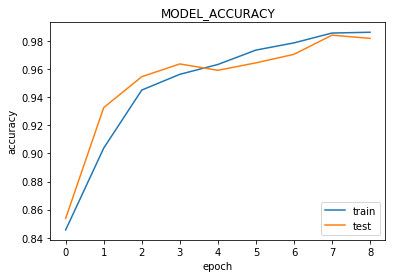

In [21]:
#for accuracy
plt.plot(pred.history['acc'])
plt.plot(pred.history['val_acc'])
plt.title('MODEL_ACCURACY')

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['train', 'test'], loc='lower right')
plt.show()



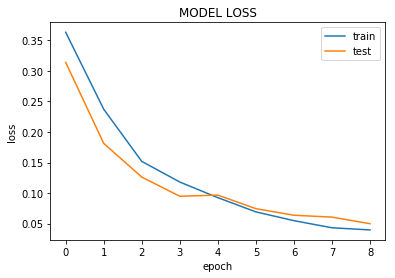

In [19]:
#for loss
plt.plot(pred.history['loss'])
plt.plot(pred.history['val_loss'])
plt.title('MODEL LOSS')

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [26]:
print("f1 Score:",f1_score(Y_test,model.predict_classes(X_test)), "     Recall Score:",recall_score(Y_test,model.predict_classes(X_test)))
print()
print("Validation Loss:",score[0],"   Validation Accuracy:",score[1])


f1 Score: 0.9368421052631578      Recall Score: 0.9222797927461139

Validation Loss: 0.04978183402933858    Validation Accuracy: 0.9818181818181818
